<a href="https://colab.research.google.com/github/vard-uhi/tasks/blob/main/Footbal_Leagua_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 2**

*Data: Historical Data of the different Footbal Leaguas*

*Task: Choose a LEAGUE you prefer and solve the following problems*

*   Calculate average number of goals for home and away teams per
SEASON for that league and sort them descending order,Which clubs are
more consistent ?
*   Construct a plot to show how this number is changing over time.
Hint:
SEASON on x-axis. Show average Home goals and Away goals on the
same plot. Be sure that your plot has appropriate axis names and titles.
*   Find following clubs for each season: the best attack (top 5), the best defense (top5)



In [1]:
#import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
#load the data
from google.colab import files
data_to_load = files.upload()

Saving data.csv to data.csv


In [3]:
import io
# .read_csv() assigns the information from the initial *.csv file to this variable
raw_data = pd.read_csv(io.BytesIO(data_to_load['data.csv']))

**Checking the content of the dataset**

In [4]:
#copying data
df = raw_data.copy()

In [5]:
df.head()

,SEASON,COUNTRY,LEAGUE,DATE,HOMETEAM,AWAYTEAM,FTSC,FTR,FTHG,FTAG,FTTG,H,D,A
0,1994.0,England,Premier League,1993-08-14,Arsenal,Coventry,0-3,A,0.0,3.0,3.0,NaN,NaN,NaN
1,1994.0,England,Premier League,1993-08-14,Aston Villa,QPR,4-1,H,4.0,1.0,5.0,NaN,NaN,NaN
2,1994.0,England,Premier League,1993-08-14,Chelsea,Blackburn,1-2,A,1.0,2.0,3.0,NaN,NaN,NaN
3,1994.0,England,Premier League,1993-08-14,Liverpool,Sheffield Weds,2-0,H,2.0,0.0,2.0,NaN,NaN,NaN
4,1994.0,England,Premier League,1993-08-14,Man City,Leeds,1-1,D,1.0,1.0,2.0,NaN,NaN,NaN


In [6]:
#checking unique value to choose one for the analysis
df['LEAGUE'].unique()

array(['Premier League', 'Bundesliga 1', 'La Liga Primera Division',
       'Serie A', 'Le Championnat', 'Eredivisie', 'Liga I',
       'Futbol Ligi 1', 'Ethniki Katigoria', 'Jupiler League'],
      dtype=object)

I will choose 'La Liga Primera Division' as an object for furthur analysis.

# **Exploratory Data Analysis of the "La Liga Primera Division"**

In [7]:
#general summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87816 entries, 0 to 87815
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEASON    87816 non-null  float64
 1   COUNTRY   87816 non-null  object 
 2   LEAGUE    87816 non-null  object 
 3   DATE      87816 non-null  object 
 4   HOMETEAM  87816 non-null  object 
 5   AWAYTEAM  87816 non-null  object 
 6   FTSC      87816 non-null  object 
 7   FTR       87814 non-null  object 
 8   FTHG      87814 non-null  float64
 9   FTAG      87814 non-null  float64
 10  FTTG      87814 non-null  float64
 11  H         57660 non-null  float64
 12  D         57660 non-null  float64
 13  A         57660 non-null  float64
dtypes: float64(7), object(7)
memory usage: 9.4+ MB


In [8]:
#changing datatype of the "Season" from float to integer
df.SEASON = df.SEASON.astype(int)

In [9]:
type(df['SEASON'][0])

numpy.int64

In [10]:
#creating new dataframe with chosen category from "League"
df_new = df[df.LEAGUE == 'La Liga Primera Division']

In [11]:
#to see dataset's first few rows
df_new.head()

,SEASON,COUNTRY,LEAGUE,DATE,HOMETEAM,AWAYTEAM,FTSC,FTR,FTHG,FTAG,FTTG,H,D,A
768,1994,Spain,La Liga Primera Division,1993-09-05,Ath Bilbao,Albacete,4-1,H,4.0,1.0,5.0,NaN,NaN,NaN
769,1994,Spain,La Liga Primera Division,1993-09-05,Ath Madrid,Logrones,1-0,H,1.0,0.0,1.0,NaN,NaN,NaN
770,1994,Spain,La Liga Primera Division,1993-09-05,Barcelona,Sociedad,3-0,H,3.0,0.0,3.0,NaN,NaN,NaN
771,1994,Spain,La Liga Primera Division,1993-09-05,La Coruna,Celta,0-0,D,0.0,0.0,0.0,NaN,NaN,NaN
772,1994,Spain,La Liga Primera Division,1993-09-05,Osasuna,Real Madrid,1-4,A,1.0,4.0,5.0,NaN,NaN,NaN


As we are not going to use "H", "D" and "A" features in our analysis, I will drop them and will aso get rid of the missing values.

In [ ]:
df_new.drop(['H','D','A'], axis=1, inplace=True)

In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10044 entries, 768 to 85657
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEASON    10044 non-null  int64  
 1   COUNTRY   10044 non-null  object 
 2   LEAGUE    10044 non-null  object 
 3   DATE      10044 non-null  object 
 4   HOMETEAM  10044 non-null  object 
 5   AWAYTEAM  10044 non-null  object 
 6   FTSC      10044 non-null  object 
 7   FTR       10044 non-null  object 
 8   FTHG      10044 non-null  float64
 9   FTAG      10044 non-null  float64
 10  FTTG      10044 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 941.6+ KB


In [15]:
#reset index
df_new = df_new.reset_index(drop=True)

In [16]:
#first few rows
df_new.head()

,SEASON,COUNTRY,LEAGUE,DATE,HOMETEAM,AWAYTEAM,FTSC,FTR,FTHG,FTAG,FTTG
0,1994,Spain,La Liga Primera Division,1993-09-05,Ath Bilbao,Albacete,4-1,H,4.0,1.0,5.0
1,1994,Spain,La Liga Primera Division,1993-09-05,Ath Madrid,Logrones,1-0,H,1.0,0.0,1.0
2,1994,Spain,La Liga Primera Division,1993-09-05,Barcelona,Sociedad,3-0,H,3.0,0.0,3.0
3,1994,Spain,La Liga Primera Division,1993-09-05,La Coruna,Celta,0-0,D,0.0,0.0,0.0
4,1994,Spain,La Liga Primera Division,1993-09-05,Osasuna,Real Madrid,1-4,A,1.0,4.0,5.0


In [ ]:
#looking at unique values in "Season" to have an understanding of the timeframe of the data
df_new['SEASON'].unique()

array([1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019])

# **Calculate average number of goals for home and away teams per SEASON for that league and sort them descending order. Which clubs are more consistent?**

Abbreviations:

* FTSC = Full Time Score
* FTR = Full Time Result  
* FTHG = Full Time Home Team Goals	
* FTAG = Full Time Away Team Goals
* FTTG = Full Time Total Goal
* H = Home Win
* D = Draw 
* A = Away Win

In [ ]:
new_df_season.head()

,SEASON,COUNTRY,LEAGUE,DATE,HOMETEAM,AWAYTEAM,FTSC,FTR,FTHG,FTAG,FTTG
81826,2018,Spain,La Liga Primera Division,2017-08-18,Leganes,Alaves,1-0,H,1.0,0.0,1.0
81827,2018,Spain,La Liga Primera Division,2017-08-18,Valencia,Las Palmas,1-0,H,1.0,0.0,1.0
81828,2018,Spain,La Liga Primera Division,2017-08-19,Celta,Sociedad,2-3,A,2.0,3.0,5.0
81829,2018,Spain,La Liga Primera Division,2017-08-19,Girona,Ath Madrid,2-2,D,2.0,2.0,4.0
81830,2018,Spain,La Liga Primera Division,2017-08-19,Sevilla,Espanol,1-1,D,1.0,1.0,2.0


In [83]:
#average number of goals for Hometeam per SEASON
hometeam_ave_goals = pd.DataFrame(df_new.groupby(['SEASON', 'HOMETEAM'])['FTHG'].mean()).reset_index()

In [84]:
hometeam_ave_goals.head()

,SEASON,HOMETEAM,FTHG
0,1994,Albacete,1.736842
1,1994,Ath Bilbao,2.052632
2,1994,Ath Madrid,1.684211
3,1994,Barcelona,2.947368
4,1994,Celta,1.315789


In [ ]:
#we want to make all available values visible, hence no limit on maximum value, that is why we use None keyword
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

In [85]:
#Hometeam average goals per Season ordered by descending, top 1
hometeam_ave_ordered = hometeam_ave_goals.groupby(['SEASON'], sort=False).apply(lambda x: x.sort_values(['FTHG','HOMETEAM'], ascending=False)[:1]) \
    .reset_index(drop=True)

In [86]:
hometeam_ave_ordered.head(10)

,SEASON,HOMETEAM,FTHG
0,1994,Barcelona,2.947368
1,1995,Real Madrid,2.368421
2,1996,Valencia,2.047619
3,1997,Barcelona,3.000000
4,1998,Ath Madrid,2.473684
5,1999,Barcelona,2.736842
6,2000,La Coruna,2.473684
7,2001,Real Madrid,2.789474
8,2002,Real Madrid,2.526316
9,2003,Real Madrid,2.736842


In [87]:
#average number of goals for Awayteam per SEASON
awayteam_ave_goals = pd.DataFrame(df_new.groupby(['SEASON', 'AWAYTEAM'])['FTAG'].mean()).reset_index()

In [88]:
awayteam_ave_goals.head()

,SEASON,AWAYTEAM,FTAG
0,1994,Albacete,0.842105
1,1994,Ath Bilbao,1.157895
2,1994,Ath Madrid,1.157895
3,1994,Barcelona,1.842105
4,1994,Celta,0.842105


In [89]:
#Awayteam average goals per Season ordered by descending, top 1
awayteam_ave_ordered = awayteam_ave_goals.groupby(['SEASON'], sort=False).apply(lambda x: x.sort_values(['FTAG','AWAYTEAM'], ascending=False)[:1]) \
    .reset_index(drop=True)

In [90]:
awayteam_ave_ordered.head(10)

,SEASON,AWAYTEAM,FTAG
0,1994,Barcelona,1.842105
1,1995,Real Madrid,1.631579
2,1996,Ath Madrid,1.666667
3,1997,Barcelona,1.857143
4,1998,Barcelona,1.894737
5,1999,Barcelona,1.842105
6,2000,Malaga,1.578947
7,2001,La Coruna,1.526316
8,2002,Ath Bilbao,1.631579
9,2003,Real Madrid,1.789474


####Construct a plot to show how this number is changing over time. Hint: SEASON on x-axis. Show average Home goals and Away goals on the same plot. Be sure that your plot has appropriate axis names and titles.

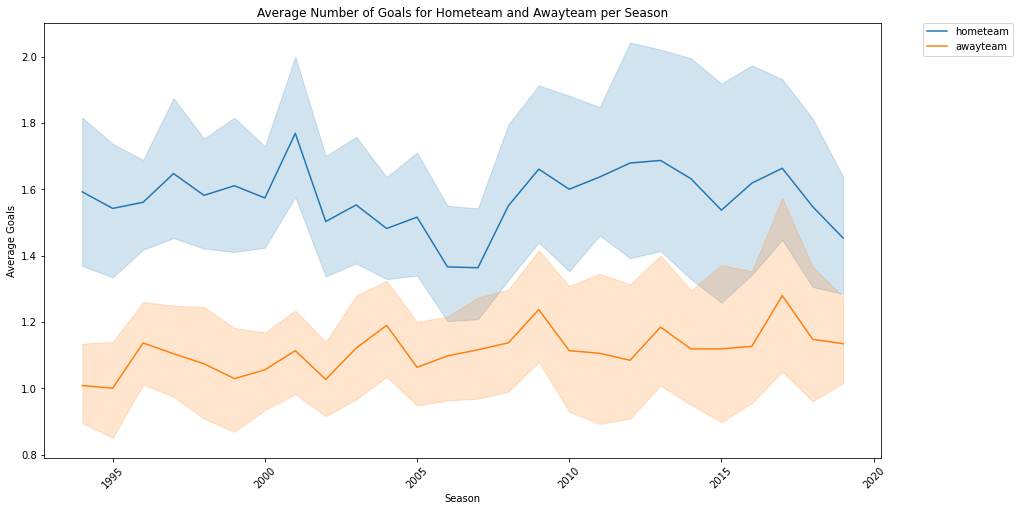

In [92]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(x="SEASON", y="FTHG", label="hometeam", data=hometeam_ave_goals) 
sns.lineplot(x="SEASON", y="FTAG", label="awayteam", data=awayteam_ave_goals, ax=ax) 
plt.xlabel('Season')
plt.ylabel('Average Goals')
plt.title('Average Number of Goals for Hometeam and Awayteam per Season')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)
plt.show()

####Find following clubs for each season: the best attack (top 5), the best defense (top5)

In [17]:
df_new.head()

,SEASON,COUNTRY,LEAGUE,DATE,HOMETEAM,AWAYTEAM,FTSC,FTR,FTHG,FTAG,FTTG
0,1994,Spain,La Liga Primera Division,1993-09-05,Ath Bilbao,Albacete,4-1,H,4.0,1.0,5.0
1,1994,Spain,La Liga Primera Division,1993-09-05,Ath Madrid,Logrones,1-0,H,1.0,0.0,1.0
2,1994,Spain,La Liga Primera Division,1993-09-05,Barcelona,Sociedad,3-0,H,3.0,0.0,3.0
3,1994,Spain,La Liga Primera Division,1993-09-05,La Coruna,Celta,0-0,D,0.0,0.0,0.0
4,1994,Spain,La Liga Primera Division,1993-09-05,Osasuna,Real Madrid,1-4,A,1.0,4.0,5.0


In [18]:
#creating sub variable
df_new['sub'] = df_new['FTHG'] - df_new['FTAG']

In [19]:
df_new['sub'] = df_new['sub'].abs()

In [20]:
df_new.head()

,SEASON,COUNTRY,LEAGUE,DATE,HOMETEAM,AWAYTEAM,FTSC,FTR,FTHG,FTAG,FTTG,sub
0,1994,Spain,La Liga Primera Division,1993-09-05,Ath Bilbao,Albacete,4-1,H,4.0,1.0,5.0,3.0
1,1994,Spain,La Liga Primera Division,1993-09-05,Ath Madrid,Logrones,1-0,H,1.0,0.0,1.0,1.0
2,1994,Spain,La Liga Primera Division,1993-09-05,Barcelona,Sociedad,3-0,H,3.0,0.0,3.0,3.0
3,1994,Spain,La Liga Primera Division,1993-09-05,La Coruna,Celta,0-0,D,0.0,0.0,0.0,0.0
4,1994,Spain,La Liga Primera Division,1993-09-05,Osasuna,Real Madrid,1-4,A,1.0,4.0,5.0,3.0


In [30]:
home_attack = (df_new.groupby(['SEASON', 'HOMETEAM'])['sub'].sum())

In [31]:
#at home goals per season
home_attack.head()

SEASON  HOMETEAM  
1994    Albacete      24.0
        Ath Bilbao    27.0
        Ath Madrid    33.0
        Barcelona     43.0
        Celta         24.0
Name: sub, dtype: float64

In [40]:
#at home defence per season
home_defence = (df_new.groupby(['SEASON', 'HOMETEAM'])['FTAG'].sum())

In [41]:
home_defence.head()

SEASON  HOMETEAM  
1994    Albacete      25.0
        Ath Bilbao    16.0
        Ath Madrid    21.0
        Barcelona     17.0
        Celta         23.0
Name: FTAG, dtype: float64

In [44]:
#away goals per season
away_attack = (df_new.groupby(['SEASON', 'AWAYTEAM'])['sub'].sum()

In [45]:
away_attack.head()

SEASON  AWAYTEAM  
1994    Albacete      25.0
        Ath Bilbao    21.0
        Ath Madrid    15.0
        Barcelona     26.0
        Celta         22.0
Name: sub, dtype: float64

In [46]:
#away defence per season
away_defence = (df_new.groupby(['SEASON', 'AWAYTEAM'])['FTHG'].sum())

In [47]:
away_defence.head()

SEASON  AWAYTEAM  
1994    Albacete      33.0
        Ath Bilbao    31.0
        Ath Madrid    33.0
        Barcelona     25.0
        Celta         28.0
Name: FTHG, dtype: float64

In [57]:
#Defence Score
defence_score = pd.DataFrame()

In [63]:
defence_score["home_defence"] = home_defence

In [65]:
defence_score["away_defence"] = away_defence

In [66]:
defence_score.head()

home_defence  away_defence
SEASON HOMETEAM                              
1994   Albacete            25.0          33.0
       Ath Bilbao          16.0          31.0
       Ath Madrid          21.0          33.0
       Barcelona           17.0          25.0
       Celta               23.0          28.0

In [67]:
defence_score['defence_score'] = defence_score['home_defence'] + defence_score['away_defence']

In [69]:
top_5_defence = defence_score.sort_values(["SEASON", 'defence_score','HOMETEAM'], ascending=False).groupby(['SEASON']).head(5)

In [72]:
#Attack Score
attack_score = pd.DataFrame()

In [77]:
attack_score['home_attack'] = home_attack

In [78]:
attack_score['away_attack'] = away_attack

In [80]:
attack_score['attack_score'] = attack_score['home_attack'] + attack_score['away_attack']

In [81]:
top_5_attack = attack_score.sort_values(["SEASON", 'attack_score','HOMETEAM'], ascending=False).groupby(['SEASON']).head(5)

In [82]:
top_5_attack.head(10)

home_attack  away_attack  attack_score
SEASON HOMETEAM                                           
2019   Sevilla             35.0         28.0          63.0
       Barcelona           36.0         26.0          62.0
       Real Madrid         31.0         30.0          61.0
       Levante             30.0         25.0          55.0
       Ath Madrid          26.0         24.0          50.0
2018   Barcelona           42.0         30.0          72.0
       Real Madrid         44.0         22.0          66.0
       Las Palmas          31.0         31.0          62.0
       Sociedad            36.0         23.0          59.0
       Betis               30.0         29.0          59.0

In [71]:
top_5_defence.head(10)

home_defence  away_defence  defence_score
SEASON HOMETEAM                                             
2019   Vallecano           32.0          38.0           70.0
       Levante             34.0          32.0           66.0
       Huesca              30.0          35.0           65.0
       Celta               25.0          37.0           62.0
       Girona              28.0          25.0           53.0
2018   La Coruna           33.0          43.0           76.0
       Las Palmas          38.0          36.0           74.0
       Malaga              27.0          34.0           61.0
       Betis               31.0          30.0           61.0
       Celta               23.0          37.0           60.0